<div style="
      color: #5975A4; 
      padding: 12px 20px; 
      border-radius: 8px; 
      text-align: center;
      max-width: 1000px;  
      margin: auto;     
      word-wrap: break-word;">
    
  <h1 
      style="
        font-size: 32px; 
        font-weight: bold; 
        margin: 0; 
        letter-spacing: 1px; 
        line-height: 1.3;">
      Absenteismo no ambiente de trabalho
  </h1>

</div>

<hr style="border: none; border-top: 3px solid #5975A4; width: 100%; margin-top: 10px;">

<h2 id="sec-2"
    style="background:#5975A4; color:white;
           padding:10px 20px; border-radius:10px;
           margin:16px 0; font-size:22px; font-weight:700; letter-spacing:1px;
           display:block;">
  1. Introdução
</h2>

Com o avanço das tecnologias de análise de dados, torna-se cada vez mais viável aplicar modelos computacionais para antecipar comportamentos complexos dentro das organizações, como o absenteísmo. Este fenômeno, ao impactar diretamente a produtividade e o planejamento de equipes, demanda soluções que combinem rigor estatístico com aplicabilidade prática. Neste contexto, este trabalho propõe o uso da Regressão Logística Multiclasse para modelar a ausência de colaboradores com base em atributos como perfil sociodemográfico, condições de trabalho e comportamento disciplinar. Utilizando um conjunto de dados real obtido da UCI Machine Learning Repository, a abordagem contempla desde a análise exploratória e pré-processamento até a aplicação de técnicas de balanceamento como o SMOTE, visando mitigar os efeitos do desbalanceamento entre classes. O uso de bibliotecas consolidadas do ecossistema Python e um pipeline bem definido permitem não apenas gerar previsões, mas também extrair insights estratégicos que possam subsidiar políticas de gestão mais assertivas.

<h2 id="sec-2"
    style="background:#5975A4; color:white;
           padding:10px 20px; border-radius:10px;
           margin:16px 0; font-size:22px; font-weight:700; letter-spacing:1px;
           display:block;">
  2. Preparação Inicial dos Dados
</h2>

<h3 id=subsection-21 
    style="
    color:#2e293a; border-bottom:2px solid #303330; 
    padding-bottom:4px;
    font-size: 24px;
    font-weight:600;
    ">
    2.1. Instalação e Importação das Bibliotecas
</h3>

In [1]:
# Instala de bibliotecas uteis
!pip install ucimlrepo
!pip install imbalanced-learn

# Importa bibliotecas utilizadas
import os
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE

# Importa módulo do repositório UCI
from ucimlrepo import fetch_ucirepo

# Define o diretório dos arquivos
output_dir = '/content/absenteeism_at_work'
image_dir = '/content/absenteeism_at_work/images'
table_dir = '/content/absenteeism_at_work/tables'

dir = list([output_dir, image_dir, table_dir])

for dir in dir:
  os.makedirs(dir, exist_ok=True)



In [2]:
# Define o estilo dos dados
plt.style.use('seaborn-v0_8-deep')


<h3 id=subsection-21 
    style="
    color:#2e293a; border-bottom:2px solid #303330; 
    padding-bottom:4px;
    font-size: 24px;
    font-weight:600;
    ">
    2.2. Carregamento e Visualização Inicial do Conjunto de Dados
</h3>

In [3]:
# Busca o dataset
absenteeism_at_work = fetch_ucirepo(id=445)

# Exibe o abstract
descricao = absenteeism_at_work.metadata['abstract']
print(f'Descrição do conjunto de dados: {descricao}')

# Exibe o sumário
info = absenteeism_at_work.metadata['additional_info']
summary = info.get('summary')
print(f'\n{summary}\n')

# Exibe as variaveis
variable = info.get('variable_info')
print(f'As variáveis disponiveis são: \n{variable}')

Descrição do conjunto de dados: The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.

As variáveis disponiveis são: 
1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases  
II Neoplasms  
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
IV Endocrine, nutritional and metabolic diseases  
V Mental and behavioural disorders  
VI D

In [4]:
# Exibe o numero de variaveis
variaveis = absenteeism_at_work.metadata['num_features']
print(f'O número de variaveis disponiveis: {variaveis}')

# Exibe o numero de instâncias
instancias = absenteeism_at_work.metadata['num_instances']
print(f'O número de instancias disponiveis: {instancias}\n')

# Exibe as informações das variáveis
variable_info = pd.DataFrame(absenteeism_at_work.variables)
display(variable_info)

O número de variaveis disponiveis: 19
O número de instancias disponiveis: 740



,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,None,None,no
1,Reason for absence,Feature,Integer,None,None,None,no
2,Month of absence,Feature,Integer,None,None,None,no
3,Day of the week,Feature,Integer,None,None,None,no
4,Seasons,Feature,Integer,None,None,None,no
5,Transportation expense,Feature,Integer,None,None,None,no
6,Distance from Residence to Work,Feature,Integer,None,None,None,no
7,Service time,Feature,Integer,None,None,None,no
8,Age,Feature,Integer,Age,None,None,no
9,Work load Average/day,Feature,Continuous,None,None,None,no


In [5]:
# Cria o conjunto de dados
df_absenteeism = pd.DataFrame(absenteeism_at_work.data['features'], columns=absenteeism_at_work.feature_names)
df_absenteeism['Absenteeism time in hours'] = absenteeism_at_work.data['targets']

# Remove os espaços e padroniza o nome das colunas
df_absenteeism.columns = df_absenteeism.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('/', '_')

# Exibe as primeiras instancias do conjunto de dados
df_absenteeism.head()

,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average_day,hit_target,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


<h3 id=subsection-21 
    style="
    color:#2e293a; border-bottom:2px solid #303330; 
    padding-bottom:4px;
    font-size: 24px;
    font-weight:600;
    ">
    2.3. Definição de Funções
</h3>

In [6]:
# Cria função para exibição padronizada de informações
def info_nunique(df):
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.notnull().sum(),
        'Null Count': df.isnull().sum(),
        'Unique Values': df.nunique()
    })

    numeric_cols = df.select_dtypes(include=['number'])

    for col in ['Mean', 'Median', 'Mode', 'Std', 'Min', 'Max']:
        summary[col] = "-"

    for col in numeric_cols.columns:
        summary.loc[col, 'Mean']   = f"{numeric_cols[col].mean():.2f}"
        summary.loc[col, 'Median'] = f"{numeric_cols[col].median():.2f}"
        summary.loc[col, 'Mode']   = f"{numeric_cols[col].mode().iloc[0]:.2f}" if not numeric_cols[col].mode().empty else "-"
        summary.loc[col, 'Std']    = f"{numeric_cols[col].std():.2f}"
        summary.loc[col, 'Min']    = f"{numeric_cols[col].min():.2f}"
        summary.loc[col, 'Max']    = f"{numeric_cols[col].max():.2f}"

    return summary

# Cria função para salvar imagem dos gráficos
def save_plot(feature_name, list_plot, output_dir='relatorio'):
    for plot in list_plot:
        if plot['feature'] == feature_name:
            path = f'{image_dir}/plot_{feature_name}.png'
            plot['fig'].savefig(path, format='png',dpi=300, bbox_inches='tight')
            print(f'Gráfico {feature_name} salvo em: {path}')
            return
    print(f'Gráfico {feature_name} não encontrado na lista fornecida.')

<h2 id="sec-2"
    style="background:#5975A4; color:white;
           padding:10px 20px; border-radius:10px;
           margin:16px 0; font-size:22px; font-weight:700; letter-spacing:1px;
           display:block;">
  3. Análise Exploratória dos Dados
</h2>

In [7]:
# Exibe informações do conjunto de dados
info_df = info_nunique(df_absenteeism)
display(info_df)

,Data Type,Non-Null Count,Null Count,Unique Values,Mean,Median,Mode,Std,Min,Max
reason_for_absence,int64,740,0,28,19.22,23.00,23.00,8.43,0.00,28.00
month_of_absence,int64,740,0,13,6.32,6.00,3.00,3.44,0.00,12.00
day_of_the_week,int64,740,0,5,3.91,4.00,2.00,1.42,2.00,6.00
seasons,int64,740,0,4,2.54,3.00,4.00,1.11,1.00,4.00
transportation_expense,int64,740,0,24,221.33,225.00,179.00,66.95,118.00,388.00
distance_from_residence_to_work,int64,740,0,25,29.63,26.00,26.00,14.84,5.00,52.00
service_time,int64,740,0,18,12.55,13.00,18.00,4.38,1.00,29.00
age,int64,740,0,22,36.45,37.00,28.00,6.48,27.00,58.00
work_load_average_day,float64,740,0,38,271.49,264.25,222.20,39.06,205.92,378.88
hit_target,int64,740,0,13,94.59,95.00,93.00,3.78,81.00,100.00


<h3 id=subsection-21 
    style="
    color:#2e293a; border-bottom:2px solid #303330; 
    padding-bottom:4px;
    font-size: 24px;
    font-weight:600;
    ">
    3.1. Estrutura e Tipificação das Variáveis
</h3>

In [9]:
# Mapea as variaveis, seus tipos e descrições
variables_dataset = {
    'reason_for_absence': {
        'type': 'category',
        'ordered': 'False',
        'description': 'Reason reported for the absence, categorized following ICD codes and other administrative reasons.',
        'categories': {
            'Certain infectious and parasitic diseases': 'I',
            'Neoplasms': 'II',
            'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism': 'III',
            'Endocrine, nutritional and metabolic diseases': 'IV',
            'Mental and behavioural disorders': 'V',
            'Diseases of the nervous system': 'VI',
            'Diseases of the eye and adnexa': 'VII',
            'Diseases of the ear and mastoid process': 'VIII',
            'Diseases of the circulatory system': 'IX',
            'Diseases of the respiratory system': 'X',
            'Diseases of the digestive system': 'XI',
            'Diseases of the skin and subcutaneous tissue': 'XII',
            'Diseases of the musculoskeletal system and connective tissue': 'XIII',
            'Diseases of the genitourinary system': 'XIV',
            'Pregnancy, childbirth and the puerperium': 'XV',
            'Certain conditions originating in the perinatal period': 'XVI',
            'Congenital malformations, deformations and chromosomal abnormalities': 'XVII',
            'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified': 'XVIII',
            'Injury, poisoning and certain other consequences of external causes': 'XIX',
            'External causes of morbidity and mortality': 'XX',
            'Factors influencing health status and contact with health services': 'XXI',
            'patient follow-up': '22',
            'medical consultation': '23',
            'blood donation': '24',
            'laboratory examination': '25',
            'unjustified absence': '26',
            'physiotherapy': '27',
            'dental consultation': '28'
        }
    },
    'month_of_absence': {
        'type': 'category',
        'ordered': 'True',
        'description': 'Month in which the absence occurred, represented by numerical values from 1 (January) to 12 (December).',
        'categories': list(range(1, 13))
    },
    'day_of_the_week': {
        'type': 'category',
        'ordered': 'True',
        'description': 'Day of the week on which the absence occurred. Monday to Friday only.',
        'categories': {'monday': 2, 'tuesday': 3, 'wednesday': 4, 'thursday': 5, 'friday': 6}
    },
    'seasons': {
        'type': 'category',
        'ordered': 'True',
        'description': 'Season of the year in which the absence took place, based on the calendar year in the Southern Hemisphere.',
        'categories': {'summer': 1, 'autumn': 2, 'winter': 3, 'spring': 4}
    },
    'transportation_expense': {
        'type': 'numeric',
        'astype': 'float',
        'description': 'Monthly expense with transportation (currency not specified).'
    },
    'distance_from_residence_to_work': {
        'type': 'numeric',
        'astype': 'int',
        'description': 'Distance between residence and workplace in kilometers.'
    },
    'service_time': {
        'type': 'numeric',
        'astype': 'int',
        'description': 'Number of years the employee has worked in the company.'
    },
    'age': {
        'type': 'numeric',
        'astype': 'int',
        'description': 'Age of the employee in years.'
    },
    'work_load_average_day': {
        'type': 'numeric',
        'astype': 'float',
        'description': 'Average daily workload. Unit not specified; assumed to be in minutes based on value magnitude.'
    },
    'hit_target': {
        'type': 'numeric',
        'astype': 'int',
        'description': 'Performance metric representing percentage of productivity goals achieved. Assumed to be in percentage (%).'
    },
    'disciplinary_failure': {
        'type': 'category',
        'ordered': 'False',
        'description': 'Indicates whether the employee has had any disciplinary failures (Yes or No).',
        'categories': {'yes': 1, 'no': 0}
    },
    'education': {
        'type': 'category',
        'ordered': 'True',
        'description': 'Highest level of education attained by the employee.',
        'categories': {'high school': 1, 'graduate': 2, 'postgraduate': 3, 'master and doctor': 4}
    },
    'son': {
        'type': 'numeric',
        'astype': 'int',
        'description': 'Number of children the employee has.'
    },
    'social_drinker': {
        'type': 'category',
        'ordered': 'False',
        'description': 'Indicates whether the employee consumes alcohol socially.',
        'categories': {'yes': 1, 'no': 0}
    },
    'social_smoker': {
        'type': 'category',
        'ordered': 'False',
        'description': 'Indicates whether the employee smokes socially.',
        'categories': {'yes': 1, 'no': 0}
    },
    'pet': {
        'type': 'numeric',
        'astype': 'int',
        'description': 'Number of pets the employee owns.'
    },
    'weight': {
        'type': 'numeric',
        'astype': 'float',
        'description': 'Weight of the employee in kilograms.'
    },
    'height': {
        'type': 'numeric',
        'astype': 'int',
        'description': 'Height of the employee in centimeters.'
    },
    'body_mass_index': {
        'type': 'numeric',
        'astype': 'float',
        'description': 'Body Mass Index (BMI) of the employee, calculated from weight and height.'
    },
    'absenteeism_time_in_hours': {
        'type': 'numeric',
        'description': 'Total number of hours the employee was absent from work.'
    }
}

In [10]:
# Categoriza as variaveis

# Transforma variaveis numericas
numeric_features = [k for k, v in variables_dataset.items() if v['type'] == 'numeric']

for col in numeric_features:
  df_absenteeism[col] = df_absenteeism[col].astype('float')


# Transforma variaveis categoricas
categorical_features = [k for k, v in variables_dataset.items() if v['type'] == 'category']

for col in categorical_features:
  ordered = variables_dataset[col].get('ordered','True') == 'True'
  df_absenteeism[col] = pd.Categorical(df_absenteeism[col], ordered=ordered)

# Transforma variaveis categoricas em ordinal e nominal
ordinal_categorical_features = [k for k, v in variables_dataset.items() if v['type'] == 'category' and v.get('ordered','True') == 'True']
nominal_categorical_features = [k for k, v in variables_dataset.items() if v['type'] == 'category' and v.get('ordered','True') == 'False']

# Confirma as transformações
print(f'O conjunto de dados é composto por:')
print(f'\n{len(numeric_features)} variaveis numericas, sendo:\n {numeric_features}')
print(f'\n{len(ordinal_categorical_features)} variaveis categóricas ordinais, sendo:\n {ordinal_categorical_features}\n')
print(f'{len(nominal_categorical_features)} variaveis categóricas nominais, sendo:\n {nominal_categorical_features}')

O conjunto de dados é composto por:

12 variaveis numericas, sendo:
 ['transportation_expense', 'distance_from_residence_to_work', 'service_time', 'age', 'work_load_average_day', 'hit_target', 'son', 'pet', 'weight', 'height', 'body_mass_index', 'absenteeism_time_in_hours']

4 variaveis categóricas ordinais, sendo:
 ['month_of_absence', 'day_of_the_week', 'seasons', 'education']

4 variaveis categóricas nominais, sendo:
 ['reason_for_absence', 'disciplinary_failure', 'social_drinker', 'social_smoker']


<h3 id=subsection-21 
    style="
    color:#2e293a; border-bottom:2px solid #303330; 
    padding-bottom:4px;
    font-size: 24px;
    font-weight:600;
    ">
    3.2. Visualização Exploratória das Variáveis
</h3>

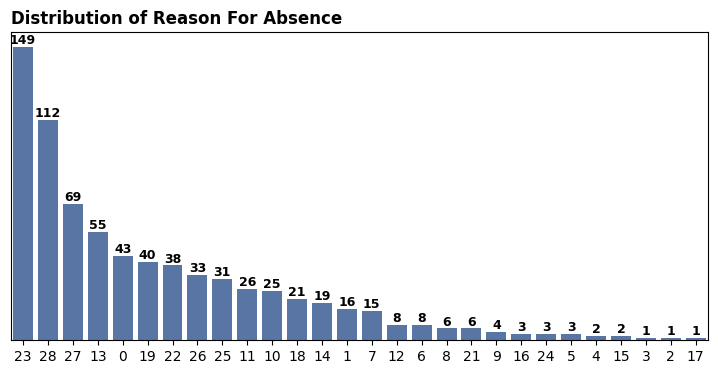

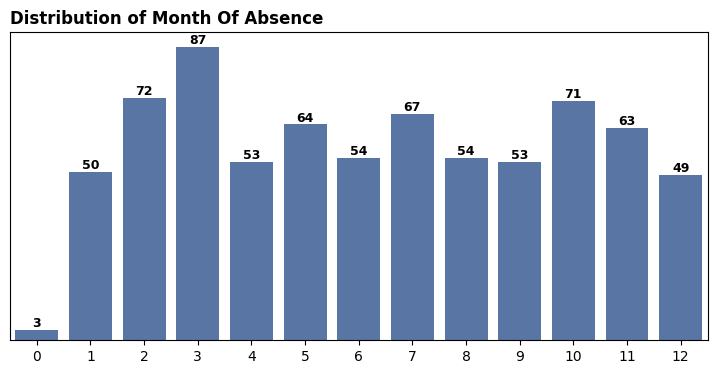

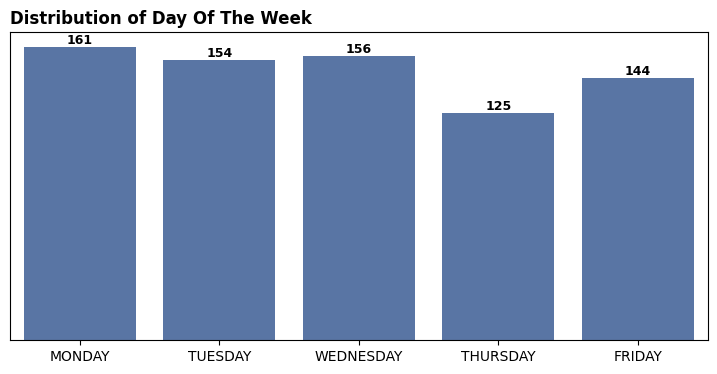

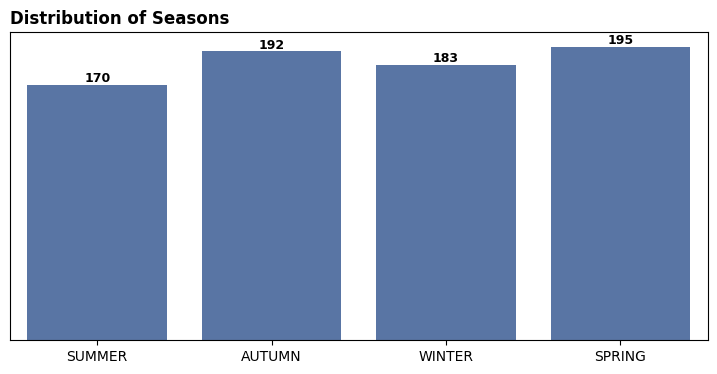

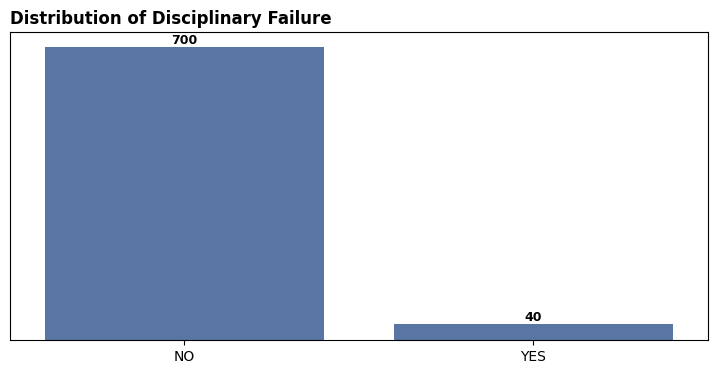

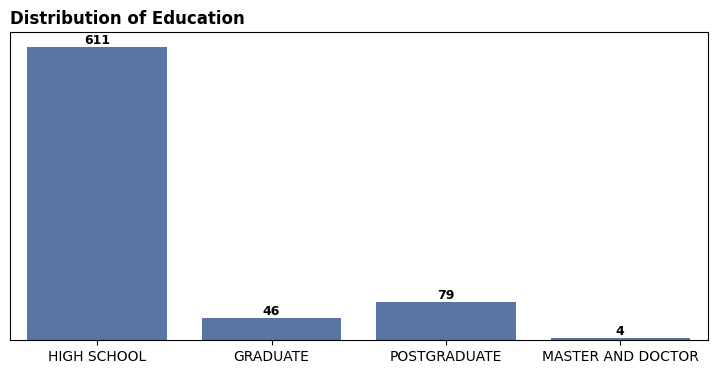

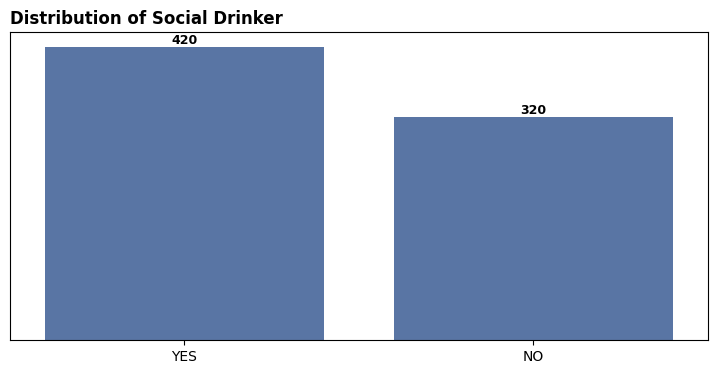

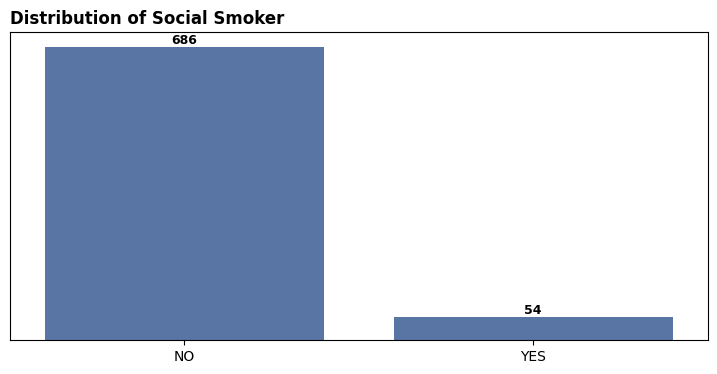

In [11]:
# Cria um gráfico par cada variavel categorica
plots_category = []

for feature in categorical_features:
    fig, ax = plt.subplots(1, 1, figsize=(9, 4))

    if df_absenteeism[feature].dtype == 'category' and df_absenteeism[feature].cat.ordered:
        order = df_absenteeism[feature].cat.categories
    else:
        order = df_absenteeism[feature].value_counts().index

    sns.countplot(data=df_absenteeism, x=feature, ax=ax, order=order)

    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, fontweight='bold')

    ax.set_xticks(range(len(order)))

    if feature != 'reason_for_absence':
        categories = variables_dataset[feature].get('categories', {})
        if isinstance(categories, dict):
            map = {v: k for k, v in categories.items()}
            ax.set_xticklabels([map.get(val, val).upper() for val in order], fontsize=10)

    ax.set_title(f'Distribution of {feature.replace("_", " ").title()}', fontsize=12, fontweight='bold', loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.tick_params(axis='x', labelsize=10)

    plots_category.append({'feature': feature, 'fig': fig, 'ax': ax})
    plt.show()

In [ ]:
# Salva os gráficos
for plot in plots_category:
    save_plot(plot['feature'], plots_category, output_dir)

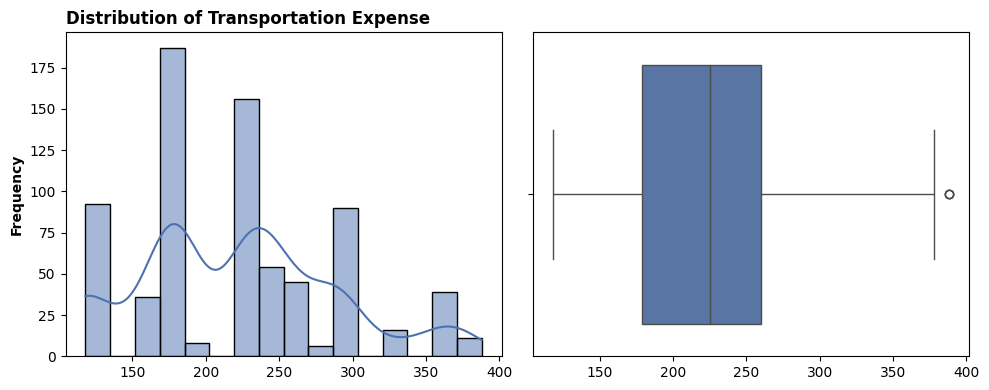

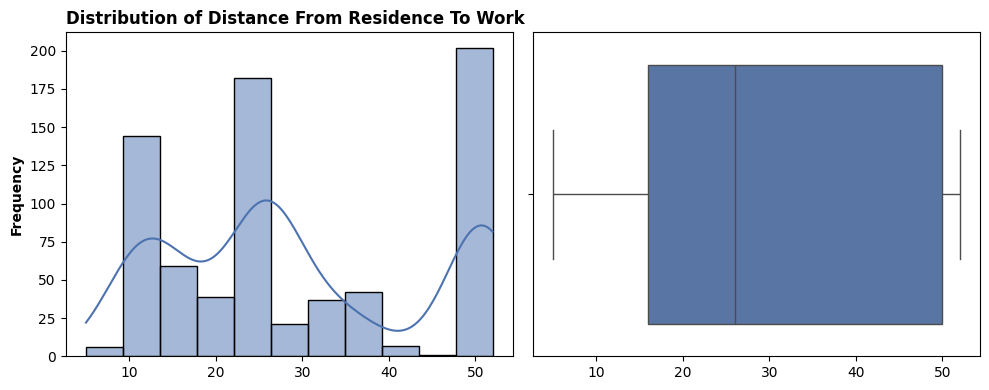

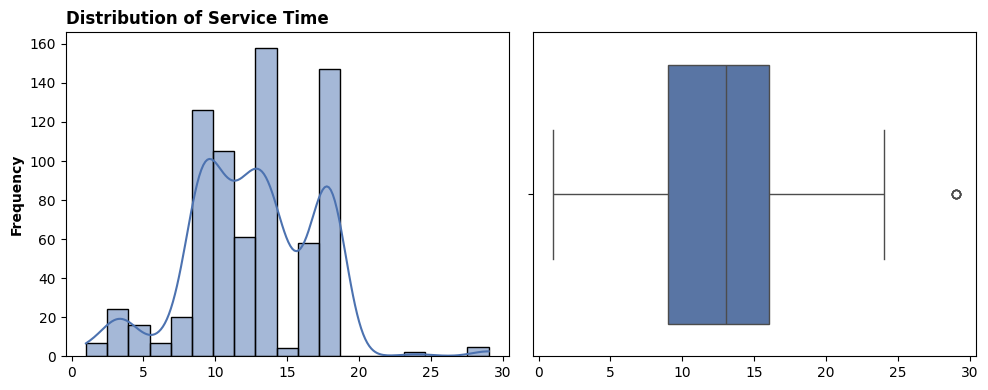

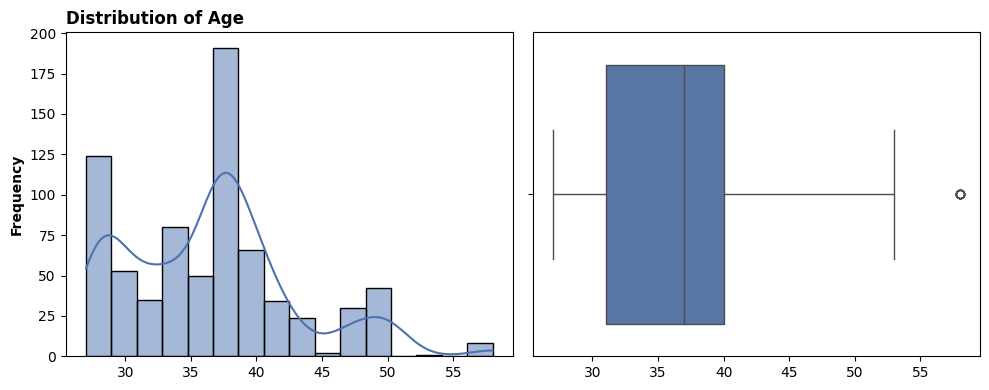

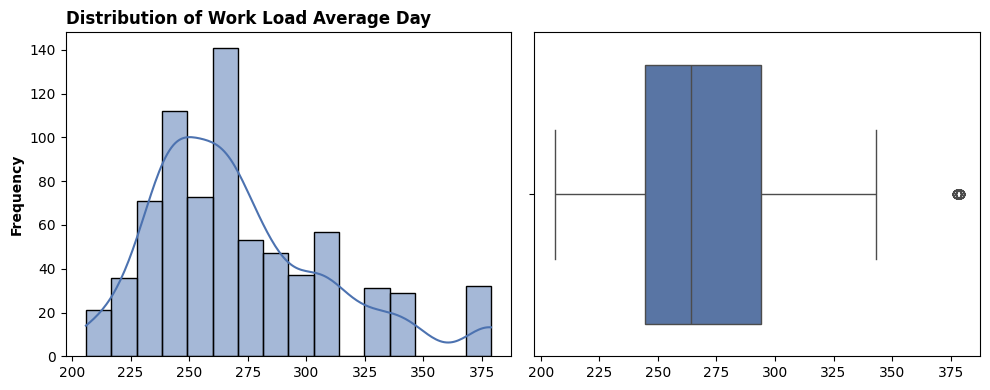

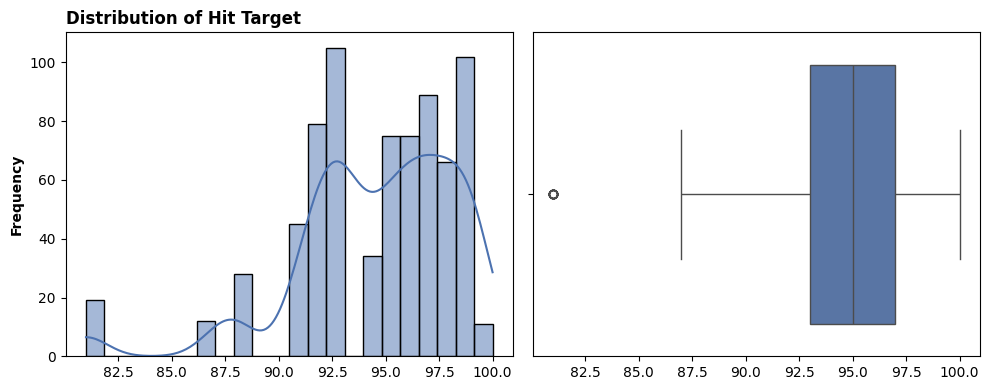

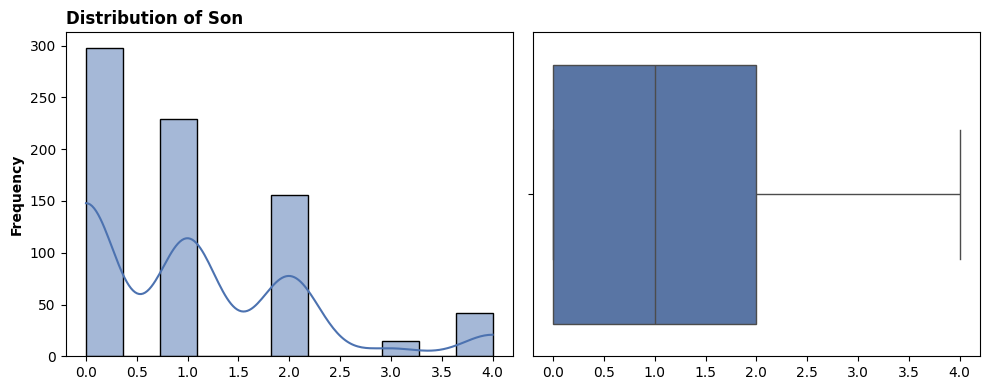

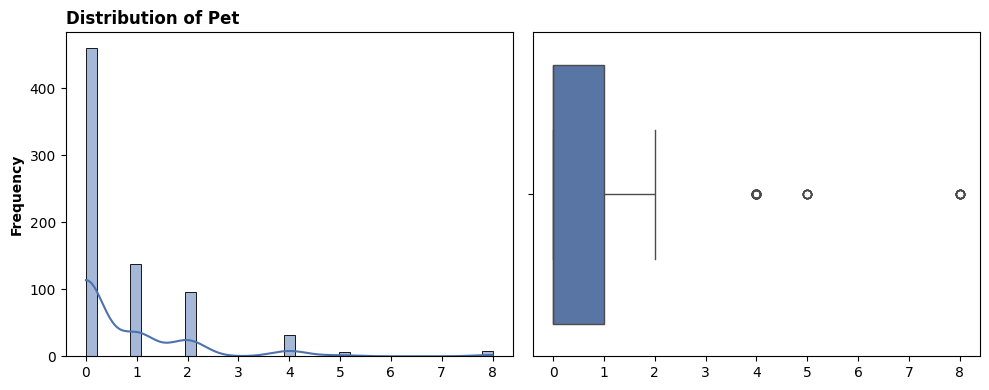

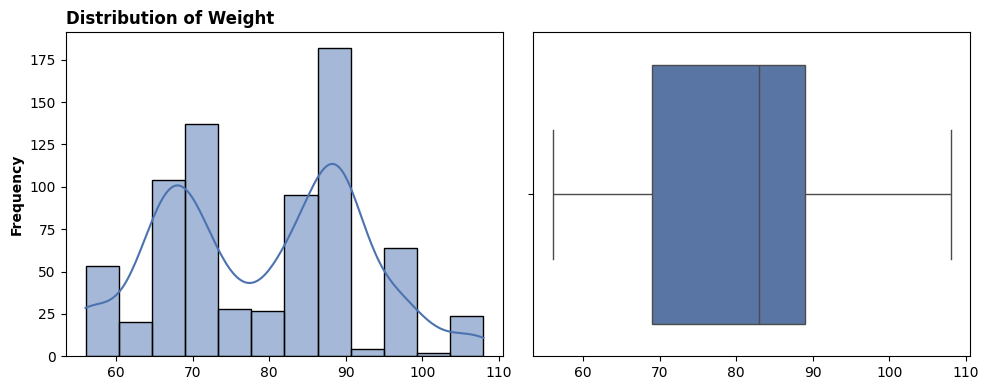

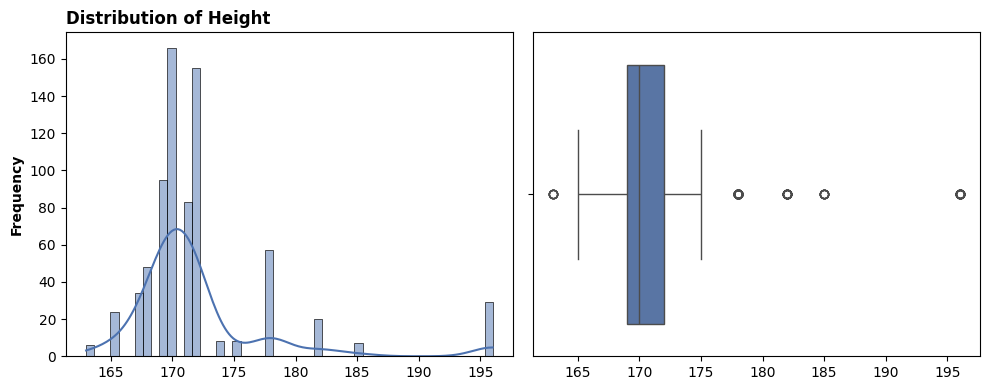

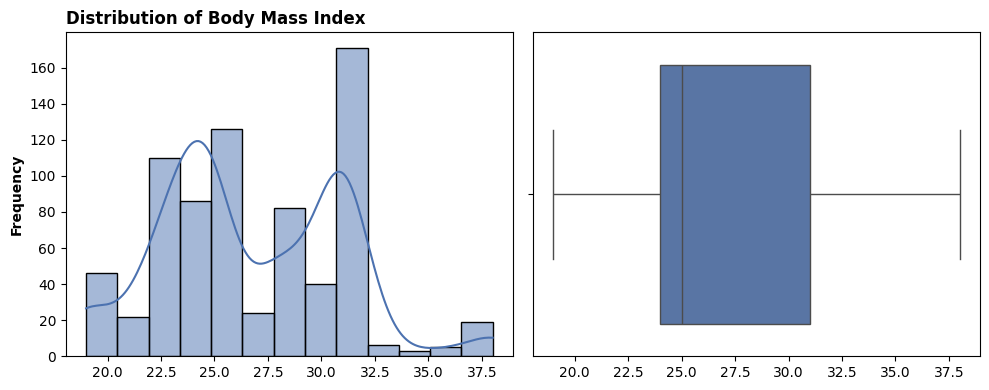

In [13]:
# Exibe um gráfico par cada variavel numérica
plots_numeric = []

for feature in numeric_features:
  if feature != 'absenteeism_time_in_hours':
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    sns.histplot(df_absenteeism[feature], kde=True, ax=axs[0])
    axs[0].set_title(f'Distribution of {feature.replace("_", " ").title()}', fontsize=12, fontweight='bold', loc='left')
    axs[0].set_xlabel('')
    axs[0].set_ylabel('Frequency', fontweight='bold', fontsize=10)
    axs[0].tick_params(axis='y', labelsize=10)
    axs[0].tick_params(axis='x', labelsize=10)

    sns.boxplot(x=df_absenteeism[feature], ax=axs[1])
    axs[1].set_xlabel('')
    axs[1].set_ylabel('')
    axs[1].tick_params(axis='y', labelsize=10)
    axs[1].tick_params(axis='x', labelsize=10)

    plots_numeric.append({'feature': feature, 'fig': fig, 'ax': axs})

    plt.tight_layout()
    plt.show()

In [ ]:
# Salva os gráficos
for plot in plots_numeric:
    save_plot(plot['feature'], plots_numeric, output_dir)

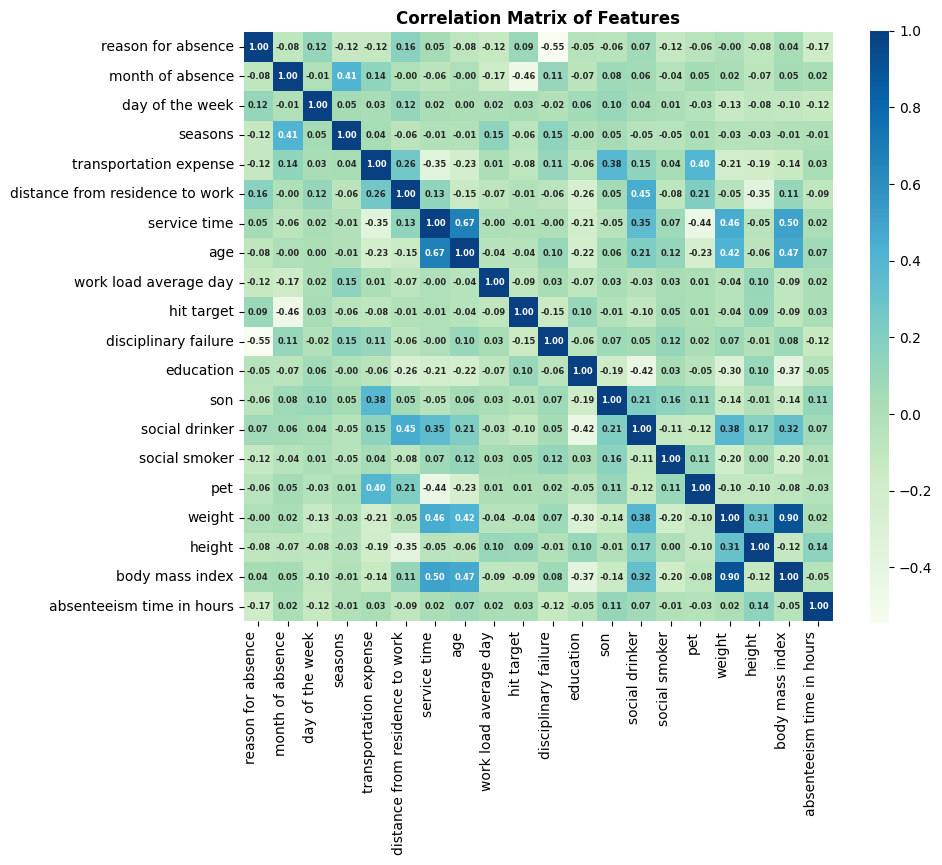

In [15]:
# Exibe a Matriz de Correlação
matrix_corr = df_absenteeism.corr()

plt.figure(figsize=(10, 10))
ax = sns.heatmap(matrix_corr,
            cmap='GnBu',
            annot=True,
            fmt=".2f",
            square=True,
            annot_kws={'size': 6, 'weight': 'bold'},
            cbar_kws={'shrink': 0.73, 'aspect': 30}
                      )
ax.set_xticklabels(
    [label.get_text().replace('_', ' ') for label in ax.get_xticklabels()],
    fontsize=10,
    ha='right'
)
ax.set_yticklabels(
    [label.get_text().replace('_', ' ') for label in ax.get_yticklabels()],
    fontsize=10
)

plt.title('Correlation Matrix of Features', fontsize=12, fontweight='bold', loc='center')

plt.savefig(f'{image_dir}/corr.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

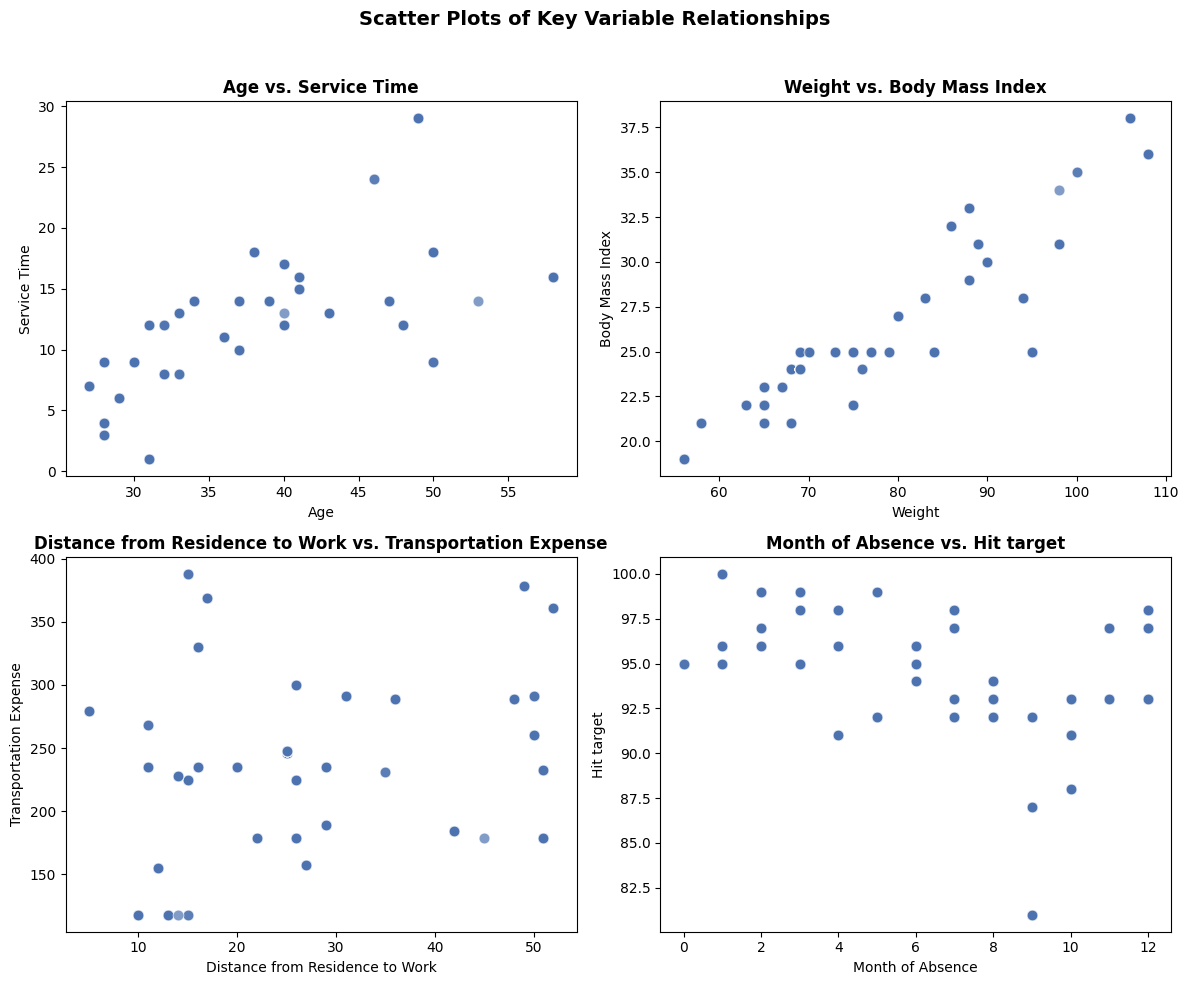

In [16]:
# Cria figura com 4 gráficos de correlação
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(ax=axes[0, 0], data=df_absenteeism, x='age', y='service_time', s=60 , alpha=0.7)
axes[0, 0].set_title('Age vs. Service Time', fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Service Time')

sns.scatterplot(ax=axes[0, 1], data=df_absenteeism, x='weight', y='body_mass_index', s=60 , alpha=0.7)
axes[0, 1].set_title('Weight vs. Body Mass Index', fontweight='bold')
axes[0, 1].set_xlabel('Weight')
axes[0, 1].set_ylabel('Body Mass Index')

sns.scatterplot(ax=axes[1, 0], data=df_absenteeism, x='distance_from_residence_to_work', y='transportation_expense', s=60 , alpha=0.7)
axes[1, 0].set_title('Distance from Residence to Work vs. Transportation Expense', fontweight='bold')
axes[1, 0].set_xlabel('Distance from Residence to Work')
axes[1, 0].set_ylabel('Transportation Expense')

sns.scatterplot(ax=axes[1, 1], data=df_absenteeism, x='month_of_absence', y='hit_target', s=60 , alpha=0.7)
axes[1, 1].set_title('Month of Absence vs. Hit target', fontweight='bold')
axes[1, 1].set_xlabel('Month of Absence')
axes[1, 1].set_ylabel('Hit target')

plt.suptitle('Scatter Plots of Key Variable Relationships', fontsize=14, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f'{image_dir}/scatterplot.png', dpi=300, bbox_inches='tight')

plt.show()

<h3 id=subsection-21 
    style="
    color:#2e293a; border-bottom:2px solid #303330; 
    padding-bottom:4px;
    font-size: 24px;
    font-weight:600;
    ">
    3.3. Análise e tipificação da Variável-Alvo
</h3>

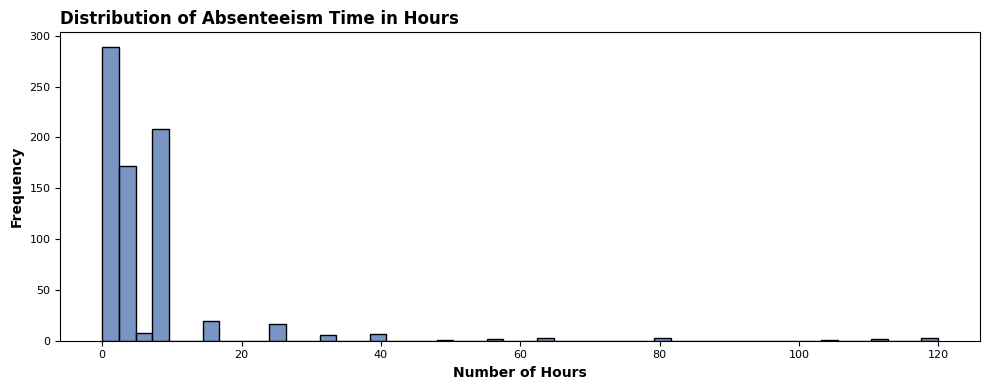

In [17]:
# Exibe um histograma com a frequencia de variavel alvvo
plt.figure(figsize=(10, 4))

sns.histplot(df_absenteeism['absenteeism_time_in_hours'], bins=50)

plt.title('Distribution of Absenteeism Time in Hours', fontsize=12, fontweight='bold', loc='left')
plt.xlabel('Number of Hours',fontsize=10, fontweight='bold')
plt.ylabel('Frequency', fontsize=10, fontweight='bold')
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

In [18]:
# Determina o número de classes com base na Regra de Sturges
n=len(df_absenteeism)
bins_sturges = 1 + np.log2(n)

# Determina o número de classes com base na Regra de Freedman-Diaconis
data = df_absenteeism['absenteeism_time_in_hours']
iqr = np.percentile(data, 75) - np.percentile(data, 25)
bin_width = 2 * iqr * len(data) ** (-1/3)
bins_diaconis = int((data.max() - data.min()) / bin_width)

# Determina o número de classes com base nas Regras do Negócio
ordered_classes = ['No absence', 'Moderate Absence', 'High Absence']
cat_type = CategoricalDtype(categories=ordered_classes, ordered=True) # transforma em categorica ordenada

def classify_absence(hours):
    if hours == 0:
        return ordered_classes[0] # sem ausencias
    elif hours <= 4:
        return ordered_classes[1] # até quatro horas de ausencias
    else:
        return ordered_classes[2] # mais de quatro horas de ausencias

df_absenteeism['absenteeism_class'] = df_absenteeism['absenteeism_time_in_hours'].apply(classify_absence)


# Visualiza os resultados
print(f'Tamanho da amostra: {n}\n')
print(f'Regra de Sturges - Número de classes: {bins_sturges.round(0)}')
print(f'Freedman-Diaconis - Número de classes: {bins_diaconis}')
print(f'Regra de Negócio - Número de classes: {len(ordered_classes)} ')

print('\nProporção de instancias por classe:')
print(df_absenteeism['absenteeism_class'].value_counts(sort=False, normalize=True).round(2))



Tamanho da amostra: 740

Regra de Sturges - Número de classes: 11.0
Freedman-Diaconis - Número de classes: 90
Regra de Negócio - Número de classes: 3 

Proporção de instancias por classe:
absenteeism_class
Moderate Absence    0.56
No absence          0.06
High Absence        0.38
Name: proportion, dtype: float64


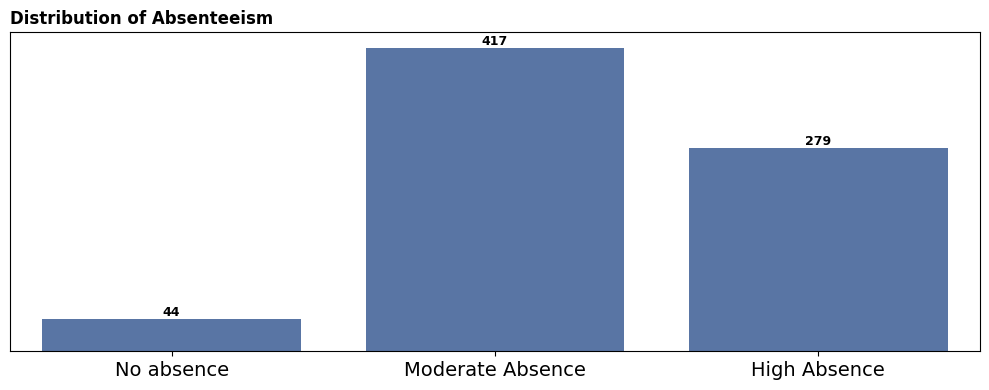

In [19]:
# Mapea as Classes da variavel-alvo
df_absenteeism['absenteeism_code'] = df_absenteeism['absenteeism_class'].map({
    ordered_classes[0]: 0,
    ordered_classes[1]: 1,
    ordered_classes[2]: 2
})

# Gera o gráfico de distribuição por classe
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df_absenteeism, x='absenteeism_class', order=ordered_classes)

for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, fontweight='bold')

plt.title('Distribution of Absenteeism', fontsize=12, fontweight='bold', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.tick_params(axis='x', labelsize=14)
plt.savefig(f'{image_dir}/distribution_absenteeism.png', format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

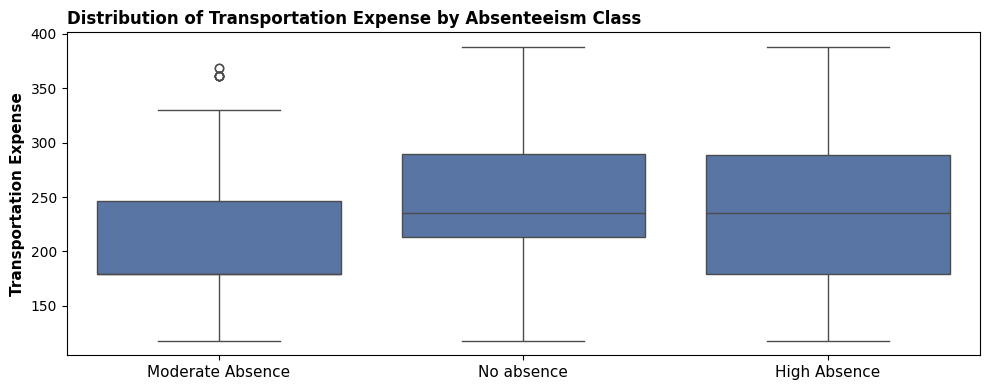

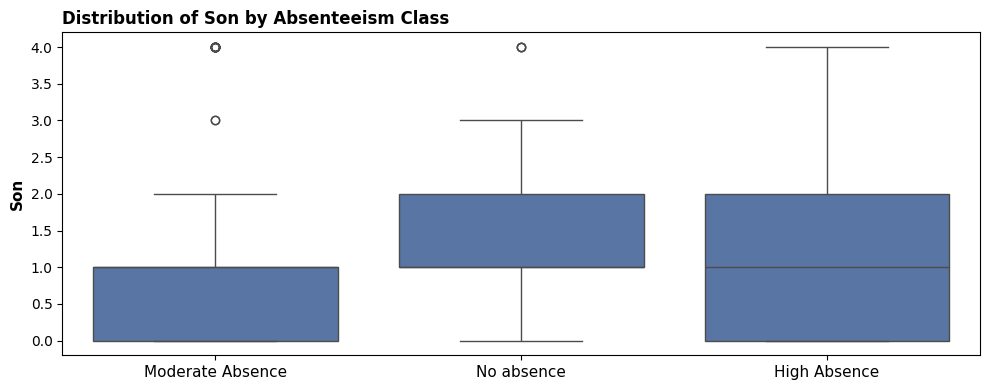

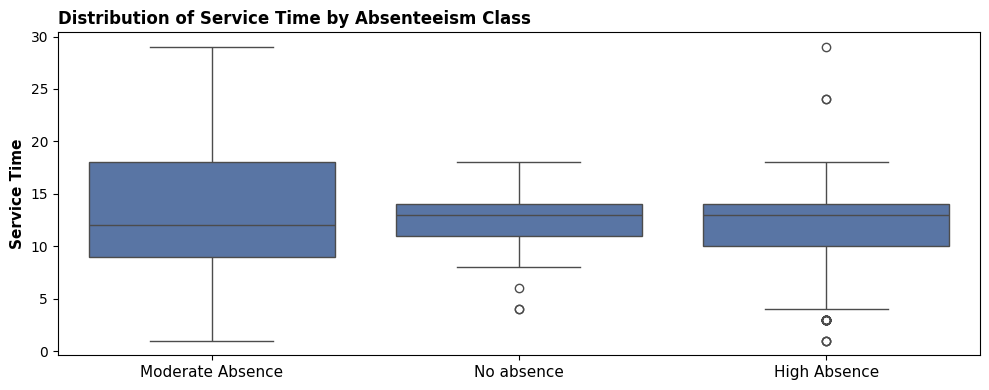

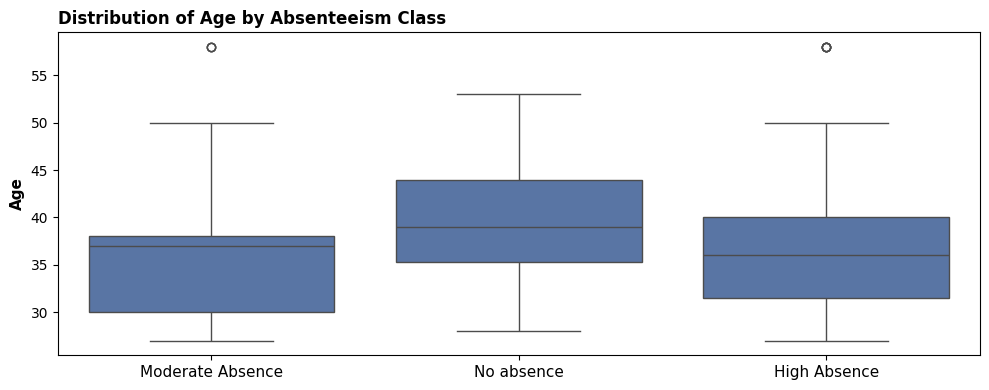

In [20]:
# Calcula uma correlação entre as váriaveis numéricas
var_corr = df_absenteeism[numeric_features + ['absenteeism_code']].corr()['absenteeism_code'].sort_values(ascending=False).round(2)

# Separa variaveis com correlação extrema
high_corr = list(var_corr.index[2:4])
low_corr = list(var_corr.index[11:])

for var in high_corr:
  plt.figure(figsize=(10, 4))

  sns.boxplot(data=df_absenteeism, x='absenteeism_class', y=var)

  plt.title(f'Distribution of {var.replace("_", " ").title()} by Absenteeism Class', fontsize=12, fontweight='bold', loc='left')
  plt.xlabel('')
  plt.ylabel(var.replace('_', ' ').title(), fontsize=11, fontweight='bold')
  plt.tick_params(axis='y', labelsize=10)
  plt.tick_params(axis='x', labelsize=11)

  plt.savefig(f'{image_dir}/boxplot_{var}_by_class.png', dpi=300, bbox_inches='tight')

  plt.tight_layout()
  plt.show()

for var in low_corr:
  plt.figure(figsize=(10, 4))

  sns.boxplot(data=df_absenteeism, x='absenteeism_class', y=var)

  plt.title(f'Distribution of {var.replace("_", " ").title()} by Absenteeism Class', fontsize=12, fontweight='bold', loc='left')
  plt.xlabel('')
  plt.ylabel(var.replace('_', ' ').title(), fontsize=11, fontweight='bold')
  plt.tick_params(axis='y', labelsize=10)
  plt.tick_params(axis='x', labelsize=11)

  plt.savefig(f'{image_dir}/boxplot_{var}_by_class.png', dpi=300, bbox_inches='tight')

  plt.tight_layout()
  plt.show()


<h2 id="sec-2"
    style="background:#5975A4; color:white;
           padding:10px 20px; border-radius:10px;
           margin:16px 0; font-size:22px; font-weight:700; letter-spacing:1px;
           display:block;">
   4. Pré-Processamento
</h2>

<h3 id=subsection-21 
    style="
    color:#2e293a; border-bottom:2px solid #303330; 
    padding-bottom:4px;
    font-size: 24px;
    font-weight:600;
    ">
    4.1 Remoção de Colunas Irrelevantes
</h3>

In [21]:
# Exibe as colunas disponiveis no conjunto de dados
print('Colunas disponíveis:\n', df_absenteeism.columns.tolist())

Colunas disponíveis:
 ['reason_for_absence', 'month_of_absence', 'day_of_the_week', 'seasons', 'transportation_expense', 'distance_from_residence_to_work', 'service_time', 'age', 'work_load_average_day', 'hit_target', 'disciplinary_failure', 'education', 'son', 'social_drinker', 'social_smoker', 'pet', 'weight', 'height', 'body_mass_index', 'absenteeism_time_in_hours', 'absenteeism_class', 'absenteeism_code']


In [22]:
# Remove colunas irrelevantes e redundante
df_absenteeism_processed = df_absenteeism.drop(['body_mass_index','absenteeism_time_in_hours', 'absenteeism_class'], axis=1)

<h3 id=subsection-21 
    style="
    color:#2e293a; border-bottom:2px solid #303330; 
    padding-bottom:4px;
    font-size: 24px;
    font-weight:600;
    ">
    4.2. Categorização das Variaveis Preditoras
</h3>

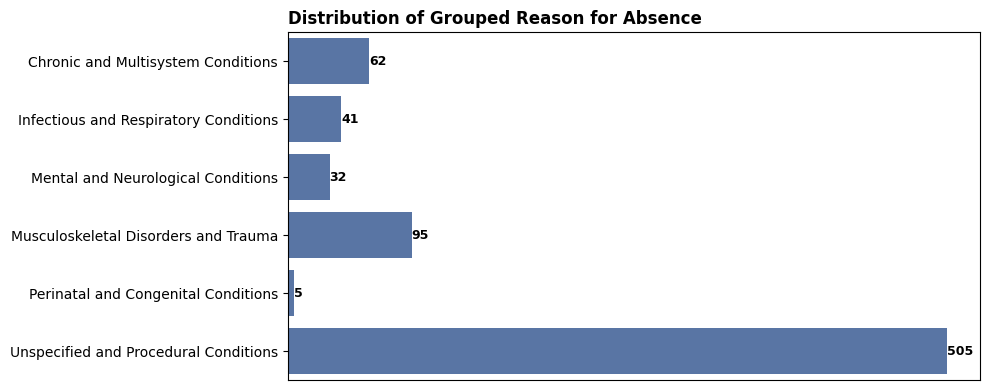

In [23]:
# Mapea as categorias de Reason For Absence e categoriza em 6 subgrupos
map_diseases = {
    0: ("Unknown or Unspecified", "Unspecified and Procedural Conditions"),
    1: ("Certain infectious and parasitic diseases", "Infectious and Respiratory Conditions"),
    2: ("Neoplasms", "Chronic and Multisystem Conditions"),
    3: ("Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism", "Chronic and Multisystem Conditions"),
    4: ("Endocrine, nutritional and metabolic diseases", "Chronic and Multisystem Conditions"),
    5: ("Mental and behavioural disorders", "Mental and Neurological Conditions"),
    6: ("Diseases of the nervous system", "Mental and Neurological Conditions"),
    7: ("Diseases of the eye and adnexa", "Mental and Neurological Conditions"),
    8: ("Diseases of the ear and mastoid process", "Mental and Neurological Conditions"),
    9: ("Diseases of the circulatory system", "Chronic and Multisystem Conditions"),
    10: ("Diseases of the respiratory system", "Infectious and Respiratory Conditions"),
    11: ("Diseases of the digestive system", "Chronic and Multisystem Conditions"),
    12: ("Diseases of the skin and subcutaneous tissue", "Chronic and Multisystem Conditions"),
    13: ("Diseases of the musculoskeletal system and connective tissue", "Musculoskeletal Disorders and Trauma"),
    14: ("Diseases of the genitourinary system", "Chronic and Multisystem Conditions"),
    15: ("Pregnancy, childbirth and the puerperium", "Perinatal and Congenital Conditions"),
    16: ("Certain conditions originating in the perinatal period", "Perinatal and Congenital Conditions"),
    17: ("Congenital malformations, deformations and chromosomal abnormalities", "Chronic and Multisystem Conditions"),
    18: ("Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified", "Unspecified and Procedural Conditions"),
    19: ("Injury, poisoning and certain other consequences of external causes", "Musculoskeletal Disorders and Trauma"),
    20: ("External causes of morbidity and mortality", "Musculoskeletal Disorders and Trauma"),
    21: ("Factors influencing health status and contact with health services.", "Unspecified and Procedural Conditions"),
    22: ("patient follow-up", "Unspecified and Procedural Conditions"),
    23: ("medical consultation", "Unspecified and Procedural Conditions"),
    24: ("blood donation", "Unspecified and Procedural Conditions"),
    25: ("laboratory examination", "Unspecified and Procedural Conditions"),
    26: ("unjustified absence", "Unspecified and Procedural Conditions"),
    27: ("physiotherapy", "Unspecified and Procedural Conditions"),
    28: ("dental consultation", "Unspecified and Procedural Conditions")
}

# Aplica a classificação de Reason For Absence como uma nova variavel
df_absenteeism_processed['reason_for_absence_class'] = df_absenteeism_processed['reason_for_absence'].map(lambda x: map_diseases[x][1])
df_absenteeism_processed['reason_for_absence_class'] = df_absenteeism_processed['reason_for_absence_class'].astype('category')

# Exibe o gráfico com a distribuição das classes de Reason For Absence
plt.figure(figsize=(10, 4))

ax = sns.countplot(data=df_absenteeism_processed, y='reason_for_absence_class')

for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, fontweight='bold')

plt.title('Distribution of Grouped Reason for Absence', fontsize=12, fontweight='bold', loc='left')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.tick_params(axis='x', labelsize=10)

plt.savefig(f'{image_dir}/distribution_reason_for_absence.png', format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()



In [24]:
# Exclui a variavel Reason For Absence para não ter redundância
df_absenteeism_processed = df_absenteeism_processed.drop('reason_for_absence', axis=1)

# Categoriza as classes com numeros inteiros
class_map = {
    'Infectious and Respiratory Conditions': 1,
    'Mental and Neurological Conditions': 2,
    'Musculoskeletal Disorders and Trauma': 3,
    'Perinatal and Congenital Conditions': 4,
    'Unspecified and Procedural Conditions': 5,
    'Chronic and Multisystem Conditions': 6
}

# Aplica o mapeamento
df_absenteeism_processed['reason_for_absence_class'] = (
    df_absenteeism_processed['reason_for_absence_class'].map(class_map).astype('int')
)

# Exibe o mapeamento de Reason For Absence com numeros inteiros
int_reason_for_absence = df_absenteeism_processed['reason_for_absence_class'].value_counts()
print("Mapeamento das Reason For Absence:")
print(int_reason_for_absence)

Mapeamento das Reason For Absence:
reason_for_absence_class
5    505
3     95
6     62
1     41
2     32
4      5
Name: count, dtype: int64


<h3 id=subsection-21 
    style="
    color:#2e293a; border-bottom:2px solid #303330; 
    padding-bottom:4px;
    font-size: 24px;
    font-weight:600;
    ">
    4.3. Separação dos dados de treino e teste
</h3>

In [25]:
# Define X e Y
X = df_absenteeism_processed.drop('absenteeism_code', axis=1)
y = df_absenteeism_processed['absenteeism_code']

# Define parâmetros de separação
test_size = 0.2
random_state = 42

# Separa o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

# Exibe o tamanho dos dados de treino e teste
print('Tamanho dos dados de treino:', X_train.shape, y_train.shape)
print('Tamanho dos dados de teste:', X_test.shape, y_test.shape)

Tamanho dos dados de treino: (592, 18) (592,)
Tamanho dos dados de teste: (148, 18) (148,)


In [26]:
# Exibe a frequencia da variavel alvo no conjunto de treino
Y_train_value_counts = y_train.value_counts(normalize=True).round(2)
print(Y_train_value_counts)

absenteeism_code
1    0.56
2    0.38
0    0.06
Name: proportion, dtype: float64


<h3 id=subsection-21 
    style="
    color:#2e293a; border-bottom:2px solid #303330; 
    padding-bottom:4px;
    font-size: 24px;
    font-weight:600;
    ">
    4.4. Classificação e Normalização
</h3>

In [27]:
# Define apenas a variavel preditiva nominal que precisa ser categorizada
nominal_features_class = ['reason_for_absence_class']

# Aplica o One-Hot Encoder na variavel categorica nominal
ohe = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = ohe.fit_transform(X_train[nominal_features_class])
X_test_ohe = ohe.transform(X_test[nominal_features_class])

# Converte as variaveis classificadas em DataFrame
ohe_columns = ohe.get_feature_names_out(nominal_features_class)
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_columns, index=X_train.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_columns, index=X_test.index)

# Confirma informaçoes estátisticas
display(info_nunique(X_train_ohe),info_nunique(X_test_ohe))

,Data Type,Non-Null Count,Null Count,Unique Values,Mean,Median,Mode,Std,Min,Max
reason_for_absence_class_2,float64,592,0,2,0.04,0.00,0.00,0.20,0.00,1.00
reason_for_absence_class_3,float64,592,0,2,0.11,0.00,0.00,0.32,0.00,1.00
reason_for_absence_class_4,float64,592,0,2,0.01,0.00,0.00,0.09,0.00,1.00
reason_for_absence_class_5,float64,592,0,2,0.69,1.00,1.00,0.46,0.00,1.00
reason_for_absence_class_6,float64,592,0,2,0.09,0.00,0.00,0.29,0.00,1.00


,Data Type,Non-Null Count,Null Count,Unique Values,Mean,Median,Mode,Std,Min,Max
reason_for_absence_class_2,float64,148,0,2,0.05,0.00,0.00,0.21,0.00,1.00
reason_for_absence_class_3,float64,148,0,2,0.18,0.00,0.00,0.39,0.00,1.00
reason_for_absence_class_4,float64,148,0,1,0.00,0.00,0.00,0.00,0.00,0.00
reason_for_absence_class_5,float64,148,0,2,0.66,1.00,1.00,0.47,0.00,1.00
reason_for_absence_class_6,float64,148,0,2,0.05,0.00,0.00,0.23,0.00,1.00


In [28]:
# Remove do vetor o nome de colunas já extintas
numeric_features.remove('body_mass_index')
numeric_features.remove('absenteeism_time_in_hours')
numeric_features

['transportation_expense',
 'distance_from_residence_to_work',
 'service_time',
 'age',
 'work_load_average_day',
 'hit_target',
 'son',
 'pet',
 'weight',
 'height']

In [29]:
# Aplica o StandardScaler para a normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

# Converte as variaveis normalizadas em DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_features, index=X_test.index)

# Confirma informaçoes estátisticas
display(info_nunique(X_train_scaled),info_nunique(X_test_scaled))


,Data Type,Non-Null Count,Null Count,Unique Values,Mean,Median,Mode,Std,Min,Max
transportation_expense,float64,592,0,24,-0.00,0.02,-0.67,1.00,-1.58,2.45
distance_from_residence_to_work,float64,592,0,24,-0.00,-0.28,-0.28,1.00,-1.70,1.47
service_time,float64,592,0,18,0.00,0.09,1.21,1.00,-2.61,3.69
age,float64,592,0,21,-0.00,0.08,-1.31,1.00,-1.46,3.32
work_load_average_day,float64,592,0,38,0.00,-0.20,-1.27,1.00,-1.69,2.68
hit_target,float64,592,0,13,-0.00,0.13,-0.39,1.00,-3.54,1.44
son,float64,592,0,5,-0.00,-0.04,-0.94,1.00,-0.94,2.64
pet,float64,592,0,6,0.00,-0.57,-0.57,1.00,-0.57,5.52
weight,float64,592,0,26,0.00,0.08,0.78,1.00,-1.79,2.26
height,float64,592,0,14,-0.00,-0.35,-0.35,1.00,-1.53,4.05


,Data Type,Non-Null Count,Null Count,Unique Values,Mean,Median,Mode,Std,Min,Max
transportation_expense,float64,148,0,19,-0.18,0.02,-0.67,0.99,-1.58,2.30
distance_from_residence_to_work,float64,148,0,22,-0.19,-0.28,-0.28,0.99,-1.70,1.47
service_time,float64,148,0,14,-0.05,-0.02,-0.81,0.93,-2.61,1.21
age,float64,148,0,18,-0.02,0.08,-1.31,1.00,-1.31,3.32
work_load_average_day,float64,148,0,38,-0.15,-0.28,-0.71,0.92,-1.69,2.68
hit_target,float64,148,0,13,0.11,0.39,-0.39,0.94,-3.54,1.44
son,float64,148,0,5,-0.13,-0.04,-0.94,0.91,-0.94,2.64
pet,float64,148,0,6,-0.03,-0.57,-0.57,1.02,-0.57,5.52
weight,float64,148,0,21,0.02,0.31,0.78,1.02,-1.79,2.11
height,float64,148,0,14,0.04,-0.26,-0.35,1.10,-1.53,4.05


<h3 id=subsection-21 
    style="
    color:#2e293a; border-bottom:2px solid #303330; 
    padding-bottom:4px;
    font-size: 24px;
    font-weight:600;
    ">
    4.5. Reconstrução do conjunto de dados
</h3>

In [30]:
# Reconstroi o conjunto de dados
X_train_processed = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test_processed = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Confirma a reconstrução
print(f'A reconstrução foi bem sucedida? {X_train_processed.columns.equals(X_test_processed.columns)}')
display(info_nunique(X_train_processed), info_nunique(X_test_processed))

A reconstrução foi bem sucedida? True


,Data Type,Non-Null Count,Null Count,Unique Values,Mean,Median,Mode,Std,Min,Max
reason_for_absence_class_2,float64,592,0,2,0.04,0.00,0.00,0.20,0.00,1.00
reason_for_absence_class_3,float64,592,0,2,0.11,0.00,0.00,0.32,0.00,1.00
reason_for_absence_class_4,float64,592,0,2,0.01,0.00,0.00,0.09,0.00,1.00
reason_for_absence_class_5,float64,592,0,2,0.69,1.00,1.00,0.46,0.00,1.00
reason_for_absence_class_6,float64,592,0,2,0.09,0.00,0.00,0.29,0.00,1.00
transportation_expense,float64,592,0,24,-0.00,0.02,-0.67,1.00,-1.58,2.45
distance_from_residence_to_work,float64,592,0,24,-0.00,-0.28,-0.28,1.00,-1.70,1.47
service_time,float64,592,0,18,0.00,0.09,1.21,1.00,-2.61,3.69
age,float64,592,0,21,-0.00,0.08,-1.31,1.00,-1.46,3.32
work_load_average_day,float64,592,0,38,0.00,-0.20,-1.27,1.00,-1.69,2.68


,Data Type,Non-Null Count,Null Count,Unique Values,Mean,Median,Mode,Std,Min,Max
reason_for_absence_class_2,float64,148,0,2,0.05,0.00,0.00,0.21,0.00,1.00
reason_for_absence_class_3,float64,148,0,2,0.18,0.00,0.00,0.39,0.00,1.00
reason_for_absence_class_4,float64,148,0,1,0.00,0.00,0.00,0.00,0.00,0.00
reason_for_absence_class_5,float64,148,0,2,0.66,1.00,1.00,0.47,0.00,1.00
reason_for_absence_class_6,float64,148,0,2,0.05,0.00,0.00,0.23,0.00,1.00
transportation_expense,float64,148,0,19,-0.18,0.02,-0.67,0.99,-1.58,2.30
distance_from_residence_to_work,float64,148,0,22,-0.19,-0.28,-0.28,0.99,-1.70,1.47
service_time,float64,148,0,14,-0.05,-0.02,-0.81,0.93,-2.61,1.21
age,float64,148,0,18,-0.02,0.08,-1.31,1.00,-1.31,3.32
work_load_average_day,float64,148,0,38,-0.15,-0.28,-0.71,0.92,-1.69,2.68


<h2 id="sec-2"
    style="background:#5975A4; color:white;
           padding:10px 20px; border-radius:10px;
           margin:16px 0; font-size:22px; font-weight:700; letter-spacing:1px;
           display:block;">
   5. Modelagem Preditiva
</h2>

<h3 id=subsection-21 
    style="
    color:#2e293a; border-bottom:2px solid #303330; 
    padding-bottom:4px;
    font-size: 24px;
    font-weight:600;
    ">
    5.1 Treinamento com Regressão Logística
</h3>

#### Modelagem

In [31]:
# Define configurações e criterios de Parada
max_iter = 1000
tol = 1e-6
random_state = 42

# Ajusta o modelo
model_reg = LogisticRegression(class_weight='balanced', max_iter=max_iter, tol=tol, random_state=random_state)

# Treina o modelo (dados de treino)
model_reg.fit(X_train_processed, y_train)

# Predita o modelo (dados de teste)
y_pred_reg = model_reg.predict(X_test_processed)

#### Avaliação de desempenho

In [32]:
# Cria a matrix de confusão
cm_reg = confusion_matrix(y_test, y_pred_reg)

# Gera o relatório de classificação
report_str = classification_report(y_test, y_pred_reg, output_dict=True)
report_reg = pd.DataFrame(report_str).transpose().round(2)


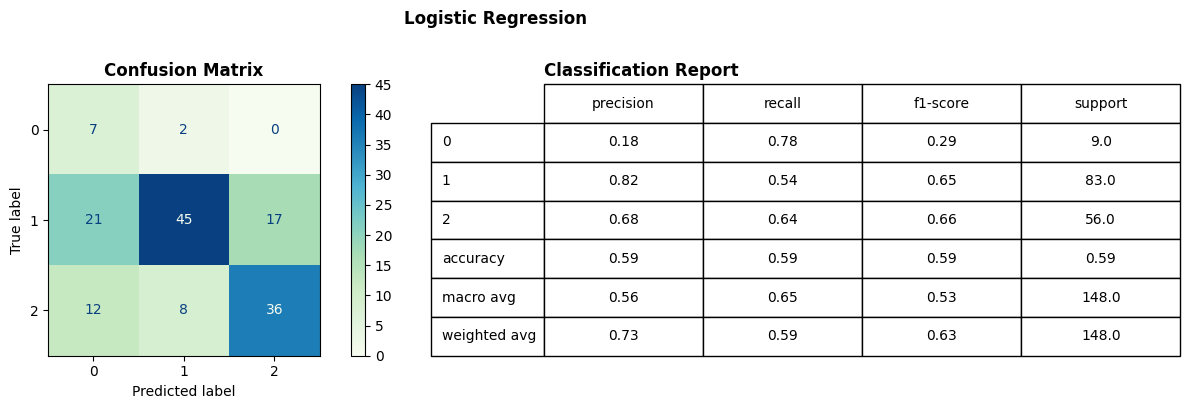

In [33]:
# Cria a figura para visualização conjunta das métricas

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_reg, display_labels=model_reg.classes_)
disp.plot(cmap='GnBu', values_format='d', ax=axes[0])

# Ajusta a Matriz de Confusão
axes[0].set_title('Confusion Matrix', fontsize=12, fontweight='bold')

# Ajusta a tabela com o relatório de classificação
axes[1].axis('off')
axes[1].set_title('Classification Report', fontsize=12, fontweight='bold', loc='left')

table = axes[1].table(cellText=report_reg.values,
                      colLabels=report_reg.columns,
                      rowLabels=report_reg.index,
                      cellLoc = 'center',
                      loc='center',
                      bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.suptitle('Logistic Regression', fontsize=12, fontweight='bold', y=1.01)

plt.savefig(f'{image_dir}/logistic_regression.png', format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

<h3 id=subsection-21 
    style="
    color:#2e293a; border-bottom:2px solid #303330; 
    padding-bottom:4px;
    font-size: 24px;
    font-weight:600;
    ">
    5.2. Treinamento com SMOTE
</h3>

#### Balanceamento dos dados

In [34]:
# Define o SMOTE
smote = SMOTE(random_state=42)

# Aplica o balanceamento nos dados já pré-processados
X_train_bal, y_train_bal = smote.fit_resample(X_train_processed, y_train)

# Verifica a nova distribuição e confirma o balanceamento
print(pd.Series(y_train_bal).value_counts())

absenteeism_code
0    334
1    334
2    334
Name: count, dtype: int64


#### Modelagem

In [35]:
# Define configurações e criterios de Parada

max_iter_bal = 1000
tol_bal = 1e-6
random_state_bal = 42

# Ajusta o modelo
model_bal = LogisticRegression(class_weight='balanced', max_iter=max_iter_bal, tol=tol_bal, random_state=random_state_bal)

# Treina o modelo (dados de treino)
model_bal.fit(X_train_bal, y_train_bal)

# Predita o modelo (dados de teste)
y_pred_bal = model_bal.predict(X_test_processed)

#### Avaliação de desempenho

In [36]:
# Cria a matrix de confusão
cm_bal = confusion_matrix(y_test, y_pred_bal)

# Gera o relatório de classificação como string
report_bal = classification_report(y_test, y_pred_bal, output_dict=True)
report_bal = pd.DataFrame(report_bal).transpose().round(2)

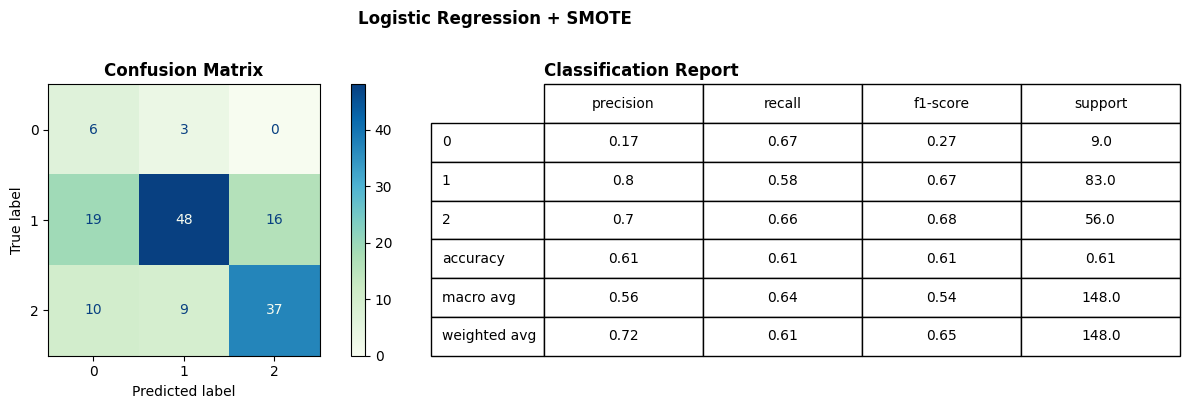

In [37]:
# Cria a figura para visualização conjunta das métricas

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bal, display_labels=model_bal.classes_)
disp.plot(cmap='GnBu', values_format='d', ax=axes[0])

# Ajusta a matriz de confusão
axes[0].set_title('Confusion Matrix', fontsize=12, fontweight='bold')

# Ajusta o relatório de classificação
axes[1].axis('off')
axes[1].set_title('Classification Report', fontsize=12, fontweight='bold', loc='left')

table = axes[1].table(cellText=report_bal.values,
                      colLabels=report_bal.columns,
                      rowLabels=report_bal.index,
                      cellLoc = 'center',
                      loc='center',
                      bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.suptitle('Logistic Regression + SMOTE', fontsize=12, fontweight='bold', y=1.01)

plt.savefig(f'{image_dir}/logistic_regression_smote.png', format='png', dpi=300, bbox_inches='tight')

plt.tight_layout()

plt.show()

<h2 id="sec-2"
    style="background:#5975A4; color:white;
           padding:10px 20px; border-radius:10px;
           margin:16px 0; font-size:22px; font-weight:700; letter-spacing:1px;
           display:block;">
   6. Conclusão
</h2>

In [38]:
# Mapea os acertos com base na matriz de confusão de cada modelo
acertos_reg = np.diag(cm_reg)
acertos_bal = np.diag(cm_bal)

# Calcula os erros com base na matriz de confusão de cada modelo
erros_reg = cm_reg.sum(axis=1) - acertos_reg
erros_bal = cm_bal.sum(axis=1) - acertos_bal

# Identifica as classes presente nos dados de teste
classes = sorted(np.unique(y_test))

# Cria o dataframe com os dados de erros e acertos
df_comparativo = pd.DataFrame({
    'Classe': classes,
    'Acertos (Original)': acertos_reg,
    'Erros  (Original)': erros_reg,
    'Acertos (Balanceado)': acertos_bal,
    'Erros (Balanceado)': erros_bal
})

df_comparativo.set_index('Classe', inplace=True)
display(df_comparativo)

,Acertos (Original),Erros (Original),Acertos (Balanceado),Erros (Balanceado)
Classe,,,,
0,7,2,6,3
1,45,38,48,35
2,36,20,37,19
